In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
crop_df=pd.read_csv("merge_crop_data.csv")

In [3]:

crop_df

,Unnamed: 0,temperature,humidity,ph,rainfall,label,N,P,K
0,0,20.879744,82.002744,6.502985,202.935536,rice,86,55,45
1,1,21.770462,80.319644,7.038096,226.655537,rice,99,38,36
2,2,23.004459,82.320763,7.840207,263.964248,rice,77,53,43
3,3,26.491096,80.158363,6.980401,242.864034,rice,89,42,40
4,4,20.130175,81.604873,7.628473,262.717340,rice,75,38,41
...,...,...,...,...,...,...,...,...,...
2195,2195,26.774637,66.413269,6.780064,177.774507,coffee,114,38,32
2196,2196,27.417112,56.636362,6.086922,127.924610,coffee,104,16,32
2197,2197,24.131797,67.225123,6.362608,173.322839,coffee,86,28,26
2198,2198,26.272418,52.127394,6.758793,127.175293,coffee,119,32,31


In [4]:
crop_df.drop(["Unnamed: 0"], axis=1,inplace=True)

In [5]:
crop_df

,temperature,humidity,ph,rainfall,label,N,P,K
0,20.879744,82.002744,6.502985,202.935536,rice,86,55,45
1,21.770462,80.319644,7.038096,226.655537,rice,99,38,36
2,23.004459,82.320763,7.840207,263.964248,rice,77,53,43
3,26.491096,80.158363,6.980401,242.864034,rice,89,42,40
4,20.130175,81.604873,7.628473,262.717340,rice,75,38,41
...,...,...,...,...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507,coffee,114,38,32
2196,27.417112,56.636362,6.086922,127.924610,coffee,104,16,32
2197,24.131797,67.225123,6.362608,173.322839,coffee,86,28,26
2198,26.272418,52.127394,6.758793,127.175293,coffee,119,32,31


In [6]:
y=crop_df["label"]
x=crop_df.drop(["label"], axis=1)

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=10)

In [8]:
sc=StandardScaler(copy=False)
sc.fit_transform(x_train)
sc.transform(x_test)

array([[-1.33633906, -2.35817965,  0.9199134 , ...,  0.14383343,
         0.64964172,  0.49197676],
       [ 0.71797209,  1.06354228, -0.41937767, ..., -0.77717898,
        -1.40532054, -0.4547101 ],
       [-0.11337954,  0.22621517, -0.24556668, ...,  1.45956545,
        -0.36336785, -0.56188219],
       ...,
       [-0.35335677,  0.91500519, -1.12337294, ..., -1.25084251,
         2.18362764,  2.59969466],
       [-0.41403371,  0.62187712,  0.50800722, ...,  2.0121729 ,
        -0.21865219, -0.59760623],
       [ 2.54238177,  0.89112535,  0.29582582, ..., -0.19825689,
         0.07077911, -0.15105582]])

In [9]:
precision = [0, 0, 0, 0, 0,0]
#list to store recall values of each model.
recall = [0, 0, 0, 0, 0,0]
#list to store f1-score values of each model.
fscore = [0, 0, 0, 0, 0,0]
ac=[]
model=['Decision Tree','Decision Tree with GridSearchCV','Random Forest','Random Forest with RandomizedSearchCV','SVM','Gaussian Naive Bayes']

# Decision Tree 

In [10]:
dt=DecisionTreeClassifier(criterion="entropy", random_state = 1)
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
acc=metrics.accuracy_score(y_test,pred_dt)
ac.append(acc)
print("Decision Tree's accuracy",acc)
precision[0], recall[0], fscore[0], Nil = precision_recall_fscore_support(y_test, pred_dt, average='macro')
print('For a DecisionTreeClassifier:  Precision = %.3f, Recall = %.3f, F1-score = %.3f'%(precision[0], recall[0], fscore[0]))



Decision Tree's accuracy 0.9528409090909091
For a DecisionTreeClassifier:  Precision = 0.956, Recall = 0.954, F1-score = 0.953


# Decision Tree with GridSearchCV

In [11]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [12]:
grid_search.fit(x_train,y_train)


Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [13]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}

In [14]:
pred_grid=grid_search.predict(x_test)
acc=metrics.accuracy_score(y_test,pred_grid)
ac.append(acc)
print("Decision Tree with GridSearchCV accuracy",acc)
precision[1], recall[1], fscore[1], Nil = precision_recall_fscore_support(y_test, pred_grid, average='macro')
print('For a DecisionTreeClassifier:  Precision = %.3f, Recall = %.3f, F1-score = %.3f'%(precision[1], recall[1], fscore[1]))



Decision Tree with GridSearchCV accuracy 0.9272727272727272
For a DecisionTreeClassifier:  Precision = 0.938, Recall = 0.930, F1-score = 0.928


# Random Forest

In [15]:
rf=RandomForestClassifier(random_state = 1)
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
acc=metrics.accuracy_score(y_test,pred_rf)
ac.append(acc)
print("Random Forest's accuracy",acc)
precision[2], recall[2], fscore[2], Nil = precision_recall_fscore_support(y_test, pred_rf, average='macro')
print('For a RandomForestClassifier:  Precision = %.3f, Recall = %.3f, F1-score = %.3f'%(precision[2], recall[2], fscore[2]))


Random Forest's accuracy 0.9857954545454546
For a RandomForestClassifier:  Precision = 0.986, Recall = 0.986, F1-score = 0.986


# Random Forest with RandomizedSearchCV

In [16]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [17]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [18]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [19]:
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 120, 'bootstrap': True}  



In [20]:
randmf = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, min_samples_leaf= 1, max_features = 'auto', max_depth= 120, bootstrap=True) 
randmf.fit( x_train, y_train) 

RandomForestClassifier(max_depth=120)

In [21]:
pred_randmf=randmf.predict(x_test)
acc=metrics.accuracy_score(y_test,pred_randmf)
ac.append(acc)
print("Random Forest Tree with RandomizedSearchCV accuracy",acc)
precision[3], recall[3], fscore[3], Nil = precision_recall_fscore_support(y_test, pred_grid, average='macro')
print('For a RandomTreeClassifier:  Precision = %.3f, Recall = %.3f, F1-score = %.3f'%(precision[3], recall[3], fscore[3]))

Random Forest Tree with RandomizedSearchCV accuracy 0.9869318181818182
For a RandomTreeClassifier:  Precision = 0.938, Recall = 0.930, F1-score = 0.928


# SVM

In [22]:
svm=SVC()
svm.fit(x_train, y_train)
pred_svm=svm.predict(x_test)
acc=metrics.accuracy_score(y_test,pred_svm)
ac.append(acc)
print("SVM accuracy",acc)
precision[4], recall[4], fscore[4], Nil = precision_recall_fscore_support(y_test, pred_grid, average='macro')
print('For a SVM:  Precision = %.3f, Recall = %.3f, F1-score = %.3f'%(precision[4], recall[4], fscore[4]))

SVM accuracy 0.9306818181818182
For a SVM:  Precision = 0.938, Recall = 0.930, F1-score = 0.928


# Gaussian Naive Bayes

In [23]:
nb= GaussianNB()
nb.fit(x_train,y_train)
pred_nb=nb.predict(x_test)
acc=metrics.accuracy_score(y_test,pred_nb)
ac.append(acc)
print("GaussianNB accuracy",acc)
precision[5], recall[5], fscore[5], Nil = precision_recall_fscore_support(y_test, pred_nb, average='macro')
print('For GaussianNB:  Precision = %.3f, Recall = %.3f, F1-score = %.3f'%(precision[5], recall[5], fscore[5]))



GaussianNB accuracy 0.990909090909091
For GaussianNB:  Precision = 0.991, Recall = 0.991, F1-score = 0.991


# Accuracy Comparison

<AxesSubplot:>

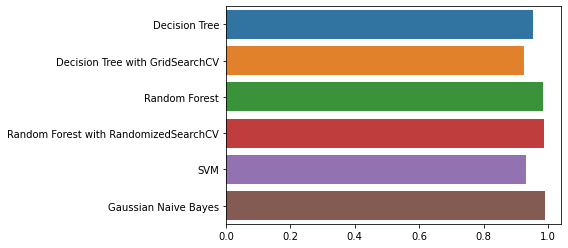

In [24]:
sns.barplot(x=ac, y=model)

In [25]:
df=pd.DataFrame(ac,index=model,columns=["Accuracy"])

In [26]:
df

,Accuracy
Decision Tree,0.952841
Decision Tree with GridSearchCV,0.927273
Random Forest,0.985795
Random Forest with RandomizedSearchCV,0.986932
SVM,0.930682
Gaussian Naive Bayes,0.990909


# Predictions

In [27]:
test1 = np.array([[20.879744,82.002744,6.502985,202.93553,86,55,45]]) 
test2 = np.array([[26.774637,66.413269,6.780064,177.774507,114,38,32]])
test3 = np.array([[18.74826712,62.49878458,6.417820493,70.23401597,68,46,19]])
test4 = np.array([[29.36792366,76.24900101,6.149934034,92.82840911,110,75,46]]) 

In [28]:
nb.predict(test1)

/Users/ananya/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['rice'], dtype='<U11')

In [29]:
nb.predict(test2)

/Users/ananya/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['coffee'], dtype='<U11')

In [30]:
nb.predict(test3)

/Users/ananya/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['maize'], dtype='<U11')

In [31]:
nb.predict(test4)

/Users/ananya/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['banana'], dtype='<U11')

## Saving the Gaussian Naive Bayes Model a it has the highest Accuracy

In [32]:
import pickle
GNB_pkl_filename = 'GNBClassifier.pkl'
GNB_Model_pkl = open(GNB_pkl_filename, 'wb')
pickle.dump(nb, GNB_Model_pkl)
GNB_Model_pkl.close()

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_fea

[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_featur